## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 24 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the sist_by delivery, as only the sist_by delivery will be get_random_amount. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file_cities.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive_algorithm search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

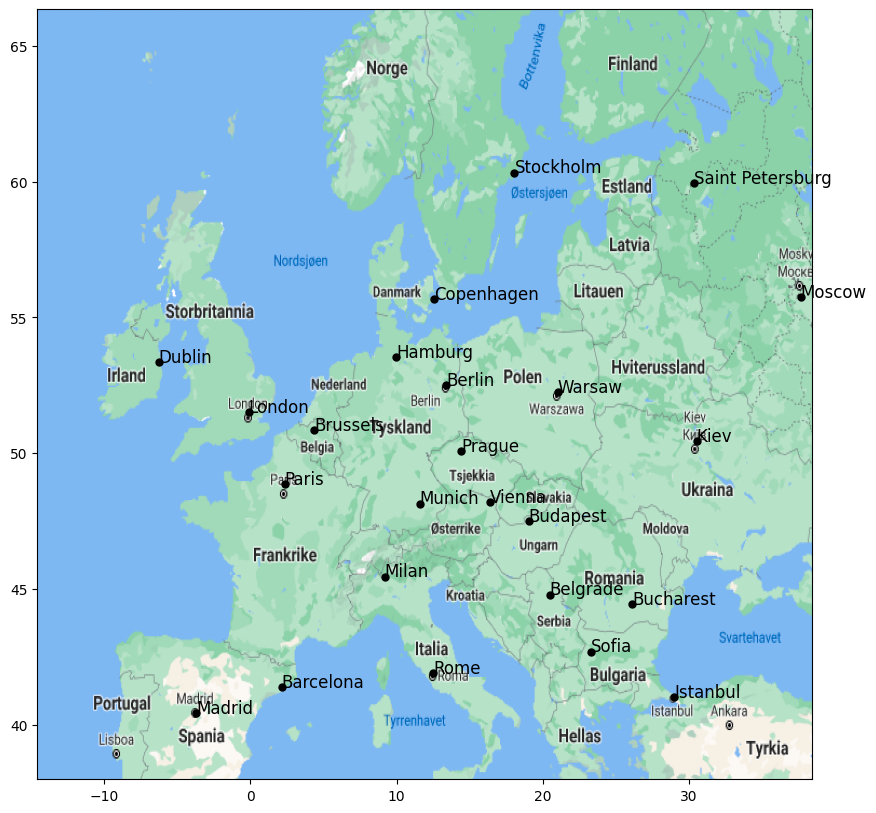

In [2]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [3]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from sist_by to start_by city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);
    plt.show();

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


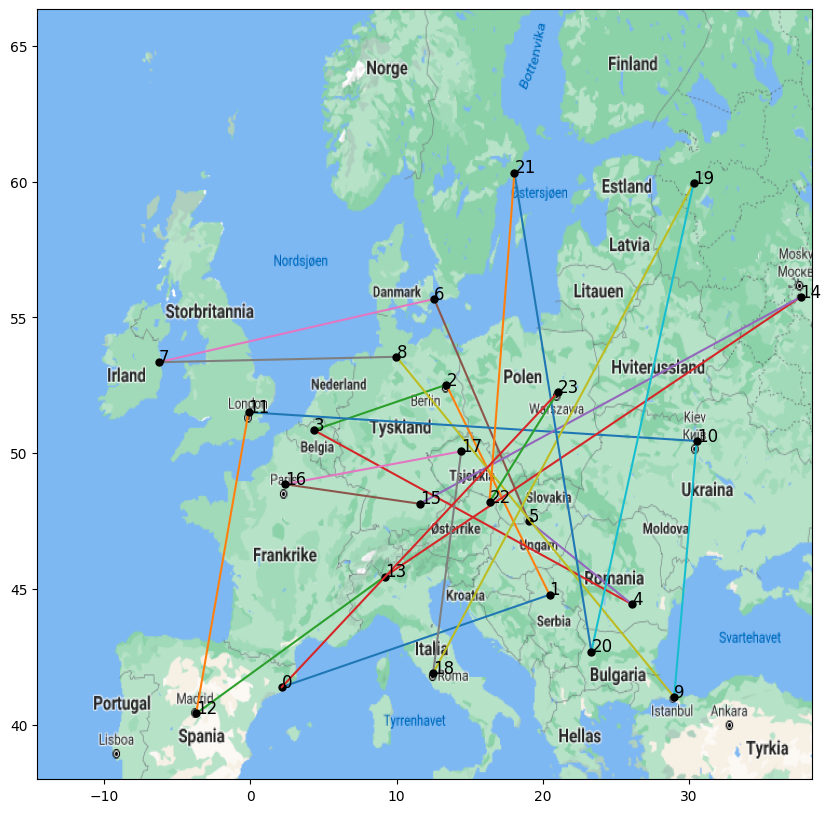

In [4]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [5]:
# Implement the algorithm here
import csv
import time 
import itertools
from sys import maxsize 

# What we are trying to accomplish here is to find the shortest tour among a subset of the european cities. We will start our
# axhaustive search algorithm by reading the file containing the european cities. Our goal is to represent the result by using a
# some kind of chart. This "chart" will contain a list of cities with their respective distance with one another. This will help
# us determine the shortest path among the given cities. 

def get_cities(amount_of_cities):
    chart = []
    with open('european_cities.csv') as file_cities:
        total_times = 0
        reader = csv.reader(file_cities, delimiter =';')
        for row in reader:
            if total_times > 0:
                chart.append(list(map(float, [row[x] for x in range(amount_of_cities)])))
            total_times += 1
            if amount_of_cities + 1 == total_times:
                break
    return chart

# Here comes the TSP_genetic algorithm: The "EXHAUSTIVE SEARCH ALGORITHM". What we are trying to accomplish with this algorithm is to find
# the shortest lengh (shortest tour) among a subset of cities. We will work with different city paths, and our job is to find the
# most effective one. With another words, a "minimal" lenght of all paths discovered. We will work with different variables
# representing the amount of cities. 

# To be more precise:
#   - 1. Find all the possible permutations available from the given amount of cities.
#   - 2. Implement the exhaustive_algorithm
#   - 3. Find the shortest path from the implementation of the algorithm and time it takes to find it.

def exhaustive_algorithm(chart, amount_of_cities):
    lengde = maxsize
    shortest_path = []

    position_cities = []
    for city_pos in range(amount_of_cities):
        position_cities.append(city_pos)

    for num_city in itertools.permutations(position_cities):
        temporal = 0
        for x in range(amount_of_cities - 1):
            temporal = temporal + chart[num_city[x]][num_city[x + 1]]
        temporal = temporal + chart[num_city[amount_of_cities - 1]][num_city[0]]
        if lengde > temporal:
            lengde = temporal
            shortest_path = num_city
            
    return lengde, shortest_path


# What i have done here is a result function. not 
def results(cities):
    if cities > 10:
        print("i have set a limit to 10 cities. If you want to find the shortest path for more than 10 cities, change the code :)")
        return ""
    else:
        chart = get_cities(cities)
        start_time = time.time()
        lengde, shortest_path = exhaustive_algorithm(chart, cities)

        print(f" --- Total number of cities: " + str(cities) + " ---")
        print(f"Shortest lengde: " + str(lengde) + " KM")
        print(f"Amount of time to find shortest path: " + str(time.time() - start_time) + " seconds.")
        print(f"Shourtest path: " + str(shortest_path) + "\n")

        return shortest_path


print("--- EXERCISE 1 (Exhaustive Search) ---")
result_6_cities = results(6)
result_6_cities = results(7)
result_10_cities = results(8)
result_6_cities = results(9)
result_10_cities = results(10)

--- EXERCISE 1 (Exhaustive Search) ---
 --- Total number of cities: 6 ---
Shortest lengde: 5018.8099999999995 KM
Amount of time to find shortest path: 0.0 seconds.
Shourtest path: (0, 1, 4, 5, 2, 3)

 --- Total number of cities: 7 ---
Shortest lengde: 5487.889999999999 KM
Amount of time to find shortest path: 0.002997875213623047 seconds.
Shourtest path: (2, 6, 3, 0, 1, 4, 5)

 --- Total number of cities: 8 ---
Shortest lengde: 6667.489999999999 KM
Amount of time to find shortest path: 0.031291961669921875 seconds.
Shourtest path: (3, 7, 0, 1, 4, 5, 2, 6)

 --- Total number of cities: 9 ---
Shortest lengde: 6678.549999999999 KM
Amount of time to find shortest path: 0.3032839298248291 seconds.
Shourtest path: (2, 6, 8, 3, 7, 0, 1, 4, 5)

 --- Total number of cities: 10 ---
Shortest lengde: 7486.309999999999 KM
Amount of time to find shortest path: 3.2580392360687256 seconds.
Shourtest path: (6, 8, 3, 7, 0, 1, 9, 4, 5, 2)



What is the shortest tour (i.e., the actual sequence of cities, and its lengde) among the start_by 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive_algorithm search on all 24 cities?

In [6]:
# Answer

# ---- QUESTION: What is the shortest tour among the start_by 10 cities? ----
# The shortest tour among the start_by 10 cities can be represented as the following list: [6, 8, 3, 7, 0, 1, 9, 4, 5, 2]
# To be more accurate, the following numbers represent a city in Europe stored in our .csv file. To find the actual names 
# of the cities, we can inmplement the following function, to get a clear picture of what cities we are refering to. 

cities = []
with open('european_cities.csv') as file_cities:
    result = ""
    file_content = csv.reader(file_cities, delimiter =';')
    for line in file_content:
        result = line
        for pos in result_10_cities:
            cities.append(result[pos])
        break

print("Shortest path tour:")
result = ""
for x in cities:
    result = result + x + "---> "

print(result + " END OF TOUR")

"""
Shortest path tour:
Copenhagen---> Hamburg---> Brussels---> Dublin---> Barcelona---> Belgrade---> Istanbul---> Bucharest---> Budapest---> Berlin--->  END OF TOUR
"""

# QUESTION: --- How long did your program take to find it?
# There might be a better way to find the result, what it took my program aproximately 6 seconds to find the result (5.64 seconds)
# Here is a quixk overview between the start_by 6 and 10 cities. 

"""
--- EXERCISE 1 (Exhaustive Search) ---
 --- Total number of cities: 6 ---
Shortest lengde: 5018.8099999999995 KM
Amount of time to find shortest path: 0.0 seconds.
Shourtest path: (0, 1, 4, 5, 2, 3)

 --- Total number of cities: 7 ---
Shortest lengde: 5487.889999999999 KM
Amount of time to find shortest path: 0.005186319351196289 seconds.
Shourtest path: (2, 6, 3, 0, 1, 4, 5)

 --- Total number of cities: 8 ---
Shortest lengde: 6667.489999999999 KM
Amount of time to find shortest path: 0.05793404579162598 seconds.
Shourtest path: (3, 7, 0, 1, 4, 5, 2, 6)

 --- Total number of cities: 9 ---
Shortest lengde: 6678.549999999999 KM
Amount of time to find shortest path: 0.5330967903137207 seconds.
Shourtest path: (2, 6, 8, 3, 7, 0, 1, 4, 5)

 --- Total number of cities: 10 ---
Shortest lengde: 7486.309999999999 KM
Amount of time to find shortest path: 5.185727834701538 seconds.
Shourtest path: (6, 8, 3, 7, 0, 1, 9, 4, 5, 2)

"""

# ---- Question: Calculate an approximation of how long it would take to perform exhaustive_algorithm search on all 24 cities? ---
# After making some testing, it takes aproximately 10 - 12 times more each time we add a new city. Meaning it would take us
# 24 cities - 10 cities (already have them on our list) = 14 = > 5 * 10^14 s = (5 * 10^14)* 86400 days = 15844043.907 years




Shortest path tour:
Copenhagen---> Hamburg---> Brussels---> Dublin---> Barcelona---> Belgrade---> Istanbul---> Bucharest---> Budapest---> Berlin--->  END OF TOUR


'\n--- EXERCISE 1 (Exhaustive Search) ---\n --- Total number of cities: 6 ---\nShortest lengde: 5018.8099999999995 KM\nAmount of time to find shortest path: 0.0 seconds.\nShourtest path: (0, 1, 4, 5, 2, 3)\n\n --- Total number of cities: 7 ---\nShortest lengde: 5487.889999999999 KM\nAmount of time to find shortest path: 0.005186319351196289 seconds.\nShourtest path: (2, 6, 3, 0, 1, 4, 5)\n\n --- Total number of cities: 8 ---\nShortest lengde: 6667.489999999999 KM\nAmount of time to find shortest path: 0.05793404579162598 seconds.\nShourtest path: (3, 7, 0, 1, 4, 5, 2, 6)\n\n --- Total number of cities: 9 ---\nShortest lengde: 6678.549999999999 KM\nAmount of time to find shortest path: 0.5330967903137207 seconds.\nShourtest path: (2, 6, 8, 3, 7, 0, 1, 4, 5)\n\n --- Total number of cities: 10 ---\nShortest lengde: 7486.309999999999 KM\nAmount of time to find shortest path: 5.185727834701538 seconds.\nShourtest path: (6, 8, 3, 7, 0, 1, 9, 4, 5, 2)\n\n'

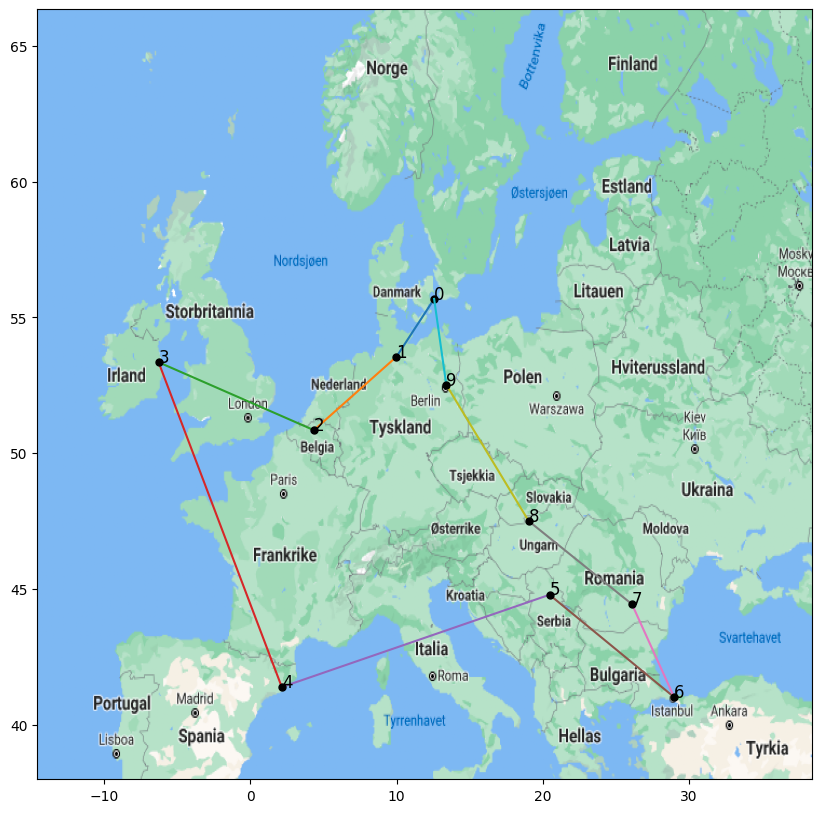

In [7]:
# Her har vi en representasjon av svaret vårt ved hjelp av plotting. 
#Example usage of the plotting-method.

plot_plan(list(cities))

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive_algorithm search for the start_by **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the lengde of the tour of the result,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 start_by cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [8]:
# Implement the algorithm here

import random
import statistics

def calculate_length(path, chart):
    lengde = 0
    for cities in range(amount_of_cities - 1):
        lengde = lengde + chart[path[cities]][path[cities +1 ]]

    lengde = lengde + chart[path[amount_of_cities - 1]][path[0]]
    return lengde

def shuffle_position():
    random_start_list = []
    for x in range(0, amount_of_cities):
        random_start_list.append(x)
    random.shuffle(random_start_list)
    lengde = calculate_length(random_start_list, chart)
    return random_start_list, lengde


def hill_climbing_algorithm(max_stop, starting_point, amount_of_cities):
    result = maxsize
    for x in range(starting_point):
        failures = 0      
        path, score = shuffle_position()
        while True:
            first_position = random.randrange(1, amount_of_cities)
            second_position = random.randrange(1, amount_of_cities)

            while first_position == second_position:
                second_position = random.randrange(1, amount_of_cities)

            path_copy = path.copy()
            path_copy[first_position], path_copy[second_position] =  path_copy[second_position], path_copy[first_position]


            if calculate_length(path_copy, chart) < calculate_length(path, chart):
                path = path_copy
                score = calculate_length(path_copy, chart)
            else:
                failures = failures + 1

            if failures > max_stop: break
        
        if result > score: result = score
    
    return result


print("--- EXERCISE 2 (Hill Climbing) ---\n")
starting_point, failure_break, amount_of_cities = 20, 1000, 10
chart = get_cities(amount_of_cities)

print("+---------------------+")
print("|        PART 1       |")
print("+---------------------+")

print("Weighing up:  EXHAUSTIVE VS HILL CLIMBING")
print("This comparison will contain the FIRST 10 CITIES ---")
print("Starting points for both algorithms: " + str(starting_point))
print("Total amount of cities: " + str(amount_of_cities))


start_time = time.time()
total_distance, shortest_path = exhaustive_algorithm(chart, amount_of_cities)

print("\n1. EXHAUSTIVE ALGORITHM:")
print("Total distance: " + str(total_distance) + " Km - Total time: " + str(time.time() - start_time) + " seconds.")


result_list = []
start_time = time.time()

for x in range(20):
    result_list.append(hill_climbing_algorithm(failure_break, starting_point, amount_of_cities))

print("\n2. HILL CLIMBING ALGORITHM:")
print("Total distance: " + str(min(result_list)) + " Km - Total time: " + str(time.time() - start_time) + " seconds.\n")

print("CONCLUSION: The hill climbing algorithm is more effective with all the given varibles. ")


print("+---------------------+")
print("|        PART 2       |")
print("+---------------------+")
print("The following part of the exercise shows the result/worst means from 20 runs. The following will show the statistics ")
print("for 10 and 24 europen cities. Both of the starting points are 20.")


print("-- 1. Hill Climbing algorithm for 10 cities --")
chart = get_cities(amount_of_cities)

result_list = []
for x in range(20):
    result_list.append(hill_climbing_algorithm(1000, 20, 10))


print("Best result: " + str(min(result_list)))
print("Worst result: " + str(max(result_list)))
print("Mean result: " + str(sum(result_list)/len(result_list)))
print("Standard deviation:" + str(statistics.stdev(result_list)))



print("-- 2. Hill Climbing algorithm for 24 cities --")
amount_of_cities = 24
chart = get_cities(amount_of_cities)

result_list = []
for x in range(20):
    result_list.append(hill_climbing_algorithm(2400, 20, 24))

print("Best result: " + str(min(result_list)))
print("Worst result: " + str(max(result_list)))
print("Mean result: " + str(sum(result_list)/len(result_list)))
print("Standard deviation:" + str(statistics.stdev(result_list)))

--- EXERCISE 2 (Hill Climbing) ---

+---------------------+
|        PART 1       |
+---------------------+
Weighing up:  EXHAUSTIVE VS HILL CLIMBING
This comparison will contain the FIRST 10 CITIES ---
Starting points for both algorithms: 20
Total amount of cities: 10

1. EXHAUSTIVE ALGORITHM:
Total distance: 7486.309999999999 Km - Total time: 3.2623608112335205 seconds.

2. HILL CLIMBING ALGORITHM:
Total distance: 7486.309999999999 Km - Total time: 1.1923141479492188 seconds.

CONCLUSION: The hill climbing algorithm is more effective with all the given varibles. 
+---------------------+
|        PART 2       |
+---------------------+
The following part of the exercise shows the result/worst means from 20 runs. The following will show the statistics 
for 10 and 24 europen cities. Both of the starting points are 20.
-- 1. Hill Climbing algorithm for 10 cities --
Best result: 7486.309999999999
Worst result: 7503.1
Mean result: 7487.149499999998
Standard deviation:3.754358134222342
-- 2.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the byer_populasjon size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report result, worst, mean and standard deviation of tour lengde out of 20 runs of the algorithm (of the result individual of sist_by generation). Also, find and plot the average fitness of the result fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is result in terms of tour lengde and number of generations of evolution
time.

Finally, plot an example optimized tour (the result of the final generation) for the three different byer_populasjon sizes, using the plot_plan method.

Among the start_by 10 cities, did your GA find the shortest tour (as found by the exhaustive_algorithm search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive_algorithm search? 

How many tours were inspected by your GA as compared to by the exhaustive_algorithm search?

+--------------------------------+
| EXERCISE 3 (GENETIC ALGORITHM) |
+--------------------------------+


TOTAL ANTALL BYER ---> 10 <--- TOTAL ANTALL BYER

Results for a total of 100 generations.
Population: 10
Best result: 7603.24
Worst result: 156160.96
Mean result: 159803.1555
Standard deviation:5430.472046996915


Population: 50
Best result: 7486.3099999999995
Worst result: 149726.19999999998
Mean result: 152250.97529999993
Standard deviation:5551.3419731188405


Population: 100
Best result: 7486.3099999999995
Worst result: 149726.19999999998
Mean result: 151379.72299999994
Standard deviation:4180.016742277599




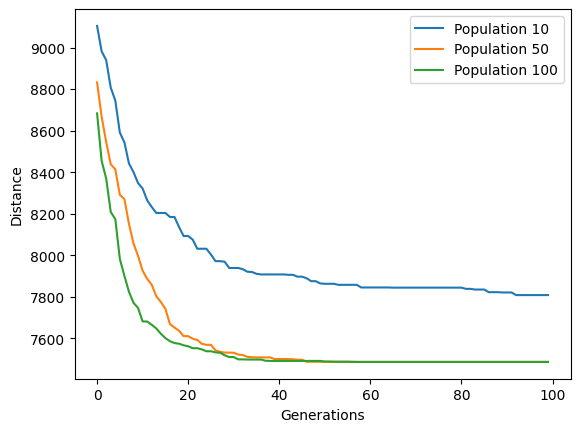

TOTAL ANTALL BYER ---> 24 <--- TOTAL ANTALL BYER

Results for a total of 100 generations.
Population: 10
Best result: 21527.25
Worst result: 396399.81000000006
Mean result: 414333.86600000015
Standard deviation:26896.575112644732


Population: 50
Best result: 15682.710000000001
Worst result: 320773.87999999995
Mean result: 358139.6294
Standard deviation:49621.02705982845


Population: 100
Best result: 15256.65
Worst result: 295446.01999999996
Mean result: 343853.80279999995
Standard deviation:55687.650583371484




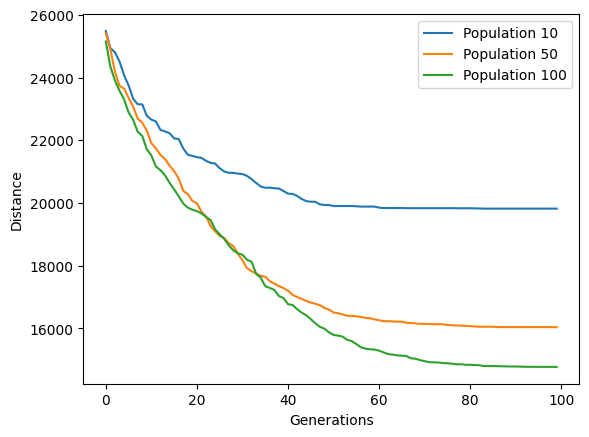

In [9]:
# --- GENETIC ALGORITHM ---

# python biblioteker jeg har brukt for å løse oppgaven. 
import time 
import math
import random

# Exercise 3 - Genetic Algorithm
# Jeg har har lagt inn et par "forbedret" hjelpefunksjoner fra de tidligere oppgave oppover for å gjøre 
# prosessen enklere. Jeg har prøvd å anvende ulike funksjoner og metoder i henhold til forelesningene 
# vi har hatt. 

def genetic_algorithm(antall_byer, liste):
    for by in range(0, antall_byer, 2):
        barn_ett, barn_to = offspring(liste[by], liste[by + 1])
        # hvis første offspring ikke forekommer i liste, append den opp i.
        if barn_ett not in liste:
            liste.append(barn_ett)
        # hvis andre offspring ikke forekommer i liste, legg den opp i. 
        if barn_to not in liste:
            liste.append(barn_to)
        
    ny_rute = sorted(liste, key = calculate_genetic_length)
    return ny_rute[:antall_byer]

#calculate_genetic_length funksjonen vil gi oss den "totale" distansen av en rute, altså det vi kaller 
# for "tour". Det jeg har valgt å gjøre her er å bruke lister med ulike ruter med de ulike byene. Dette er for å 
# gjøre prosessen enklere, men også for å gjøre hele prosessen fortere. Vi returnerer lengden 
# på ruten vi har sendt inn. 

def calculate_genetic_length(byer):
    start_by, sist_by = byer[0], byer[-1] 
    lengde = float(data[start_by + 1][sist_by])
        
    for by in range(0, len(byer) - 1):
        lengde = lengde + float(data[byer[by]+1][byer[by+1]])
    return lengde

# "offspring"-funksjonen vil da kombinere to "start" ruter med hverandre, altså foreldre.  
# i biologiske termer kan vi tenke at vi tar to "foreldre", altså parents, og kombinerer den sammen for 
# å så få "barn" eller såkalte "offsprings".

def offspring(forelder_ett, forelder_to):
    parent_ett, parent_to = sorted([random.randint(0, len(forelder_ett) -1) for by in range(2)])
    barn_ett, barn_to = forelder_ett.copy(), forelder_to.copy()

    for by in range(parent_ett, parent_to):
        temp_barn_ett = forelder_to[by]
        index_barn = forelder_ett.index(temp_barn_ett)
        barn_ett[by], barn_ett[index_barn] = barn_ett[index_barn], barn_ett[by]

        # gjør det samme to ganger for begge to "offsprings."
        temp_barn_ett = forelder_ett[by]
        index_barn = forelder_to.index(temp_barn_ett)
        barn_to[by], barn_to[index_barn] = barn_to[index_barn], barn_to[by]
    return barn_ett, barn_to

# følgende funksjon er "hjernen" til oppgaven, fordi det er her vi anvender hejlpefunksjonene for 
# å finne den korteste utvei. 
def TSP_genetic(antall_byer, generations ,beste_rute,byer):
    liste_by, liste = [], list(range(0, byer))

    # tilfeldig rekkefølge på byene. 
    for x in range(generations):
        random.shuffle(liste)
        liste_by.append(liste[:])
    
    result = 0
    
    for i in range(generations):
        liste_by = genetic_algorithm(antall_byer, liste_by)
        result = calculate_genetic_length(liste_by[0])
        beste_rute[i] = beste_rute[i] + result

    return beste_rute, liste_by[0], liste_by[-1], result

 
# Her er vårt hovedmetode, her vil vi sende inn noen parametre som vi kan bruke til å printe ulike resultater. 
# Med dette, så trenger vi ikke å skrive 100 linjer for å teste ulike resultater. 
def genetic_algorithm_plot(generations, population, antall_by):
    beste_rute = [0] * generations

    for i in range(20):  
        liste_med_byer = []
        liste_med_by, best_path, worst_path, best_distance = TSP_genetic(population, generations, beste_rute, antall_by)

    for i in best_path:
        liste_med_byer.append(data[0][i])
        
    mean = np.mean(liste_med_by)
    std = np.std(liste_med_by)
    average = np.array(liste_med_by)/20

    return best_distance, liste_med_by[-1], mean, std, average

# denne metoden er for å holde resultatet oversiktig, sånn at vi kan teste med ulike byer.
def generate_plot(generations, antall_byer):
    population_list = [10, 50, 100]
    average_results = []
    print("TOTAL ANTALL BYER ---> " + str(antall_byer) + " <--- TOTAL ANTALL BYER\n")
    print("Results for a total of " + str(int(generations)) + " generations.")
    for x in population_list:
        best, worst, mean, standard_deviation, average = genetic_algorithm_plot(generations, x, antall_byer)
        average_results.append(average)
        print("Population: " + str(x))
        print("Best result: " + str(best))
        print("Worst result: " + str(worst))
        print("Mean result: " + str(mean))
        print("Standard deviation:" + str(standard_deviation) + "\n\n")

    plt.plot(range(0,generations), average_results[0], label='Population 10')
    plt.plot(range(0,generations), average_results[1], label='Population 50')
    plt.plot(range(0,generations), average_results[2], label='Population 100')
    plt.xlabel("Generations")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()

print("+--------------------------------+")
print("| EXERCISE 3 (GENETIC ALGORITHM) |")
print("+--------------------------------+\n\n")

generate_plot(100, 10) # plotting med 10 byer
generate_plot(100, 24) # plotting med 24 byer



#### Among the start_by 10 cities, did your GA find the shortest tour (as found by the exhaustive_algorithm search)? Did it come close? 
#Hvis vi tar utgangspunkt i resultatene vi har fått og det vi har lært, så vil den i utgangspunkt aldri finne den "korteste" vei for en #befolkning på 10, men vil derimot finne den korteste for en befolkning på 50 og oppover. 


#### For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive_algorithm search?
#Jeg har ikke inkluder tiden det tar å finne resultatet for 10 byer, men etter jeg hadde testet programmet mitt med time, 
#så tar det ca mellom 10 og 15 sekunder, noe som er betydelig raskere enn exhaustive algoritmen min som jeg har brukt tidligere 
#i oppgaven. 

#### How many tours were inspected by your GA as compared to by the exhaustive_algorithm search?
#Det kan hende jeg har feil har, men jeg er ganske sikker på at for 10 byer vil det være ca. 20 000, 100 000 for en populasjon på 50 og 200 000 for 100 i befolkning. Det vil ta mer og mer tid jo større verdier vi har. 

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the byer_populasjon.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the byer_populasjon as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [10]:
# ANSWER